# Práctica 2: 



##### Cookbook [@data_mining_2020](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020/blob/master/README.ipynb)

## Resources

* [Missigno](https://github.com/ResidentMario/missingno)


### **Prerequisitos** 

Instalar [missigno](https://anaconda.org/conda-forge/missingno) a través de ```conda``` (o sea en la terminal)

```conda install -c conda-forge missingno```

Situarse en la carpeta ```/vagrant/``` pues ahí está la *carpeta compartida* entre la máquina vitual y nuestro sistema operativo. ¿Dónde dice? Pues cuando corremos la máquina virtual con ```vagrant up```, nos dice dónde está esa carpeta en ambos lados

```
==> ubuntu-18-01: Mounting shared folders...
    ubuntu-18-01: /vagrant => /Users/jacoboleon/Documents/vagrant-ubuntu
```

Entonces el sitio de trabajo será esa carpeta ```/vagrant/```

```cd /vagrant/```


Descargar la tabla ```vivienda``` de la ENH

* En terminal

  *A través de ```wget```

    ```wget https://www.inegi.org.mx/contenidos/programas/enh/2017/microdatos/vivienda_enh_2017_csv.zip```
  * Instalar ```unzip```
  
    ```sudo apt-get install unzip```

  * Checar la versión instalada

    ```unzip -v```

  * Descomprimir el ```.zip```

    ```unzip vivienda_enh_2017_csv.zip```

Inicializar un entorno de trabajo con Anacoda, puede ser de manera local en el propio sistema operativo, a través de ```anaconda-navigator``` o con una máquina virtual. Si se utiliza lo segundo, la máquina virtual, entonces se puede acceder de dos formas:

* Checar la [Práctica 0: configurar el entorno de trabajo](https://nbviewer.jupyter.org/github/JacoboGGLeon/data_mining_2020/blob/master/Pr%C3%A1ctica_0.ipynb)

* Ejecutar el servicio ```jupyter lab``` 

  ```jupyter-lab --ip=0.0.0.0 --NotebookApp.token=''```

* Ejecutar el servicio y dejarlo activo

  ```nohup jupyter-lab --ip=0.0.0.0 --NotebookApp.token='' --allow-root > error.log &```

Si se utiliza ```anaconda-navigator``` simplemente click en el botón *launch* donde dice Jupyter Lab

![](https://docs.google.com/uc?export=download&id=1Y6FbUz4hI03SFeu6RVeGmX83zrm1tD4_)


## Recipe 

### LOAD

Importar paquetes

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
%matplotlib inline

Si aparece este error hay que instalar ```missigno``` 

```
---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
<ipython-input-1-3b696379d9e4> in <module>
      1 import pandas as pd
----> 2 import missingno as msno
      3 import numpy as np
      4 get_ipython().run_line_magic('matplotlib', 'inline')

ModuleNotFoundError: No module named 'missingno'
```

Definimos la ruta del archivo

In [2]:
file = "vivienda.csv"

Cargamos la tabla en un dataframe 



In [9]:
df = pd.read_csv(file)

In [10]:
df.head()

,folioviv,tipo_viv,condominio,elevador,mat_pared,mat_techos,mat_pisos,ais_techos,ais_pared,ais_ventan,...,tv_paga,auto_pick,tot_hog,ubica_geo,ageb,tam_loc,est_socio,est_dis,upm,factor
0,100008010,1,,,8,9,3,2,2,2,...,2,1,1,10010000,000-0,1,4,8,1,221
1,100008034,1,,,8,9,3,1,2,2,...,1,1,1,10010000,000-0,1,4,8,1,221
2,100008077,1,,,8,9,3,9,9,2,...,1,1,1,10010000,000-0,1,4,8,1,221
3,100025016,1,,,8,9,3,1,2,2,...,2,1,1,10010000,000-0,1,3,7,2,194
4,100025022,1,,,8,9,3,2,2,2,...,1,1,1,10010000,000-0,1,3,7,2,194


Copiamos el dataframe para trabajar sobre él sin alterar el origen de los datos

In [11]:
df_copy = df.copy()

Revisamos las dimensiones del problema, literalmente

In [12]:
df_copy.shape

(56680, 110)

Revisamos el número de observaciones o filas

In [13]:
df_copy.shape[0]

56680

Revisamos el número de variables o características o atributos

In [14]:
df_copy.shape[1]

110

Revisamos las variables

In [15]:
df_copy.columns

Index(['folioviv', 'tipo_viv', 'condominio', 'elevador', 'mat_pared',
       'mat_techos', 'mat_pisos', 'ais_techos', 'ais_pared', 'ais_ventan',
       ...
       'tv_paga', 'auto_pick', 'tot_hog', 'ubica_geo', 'ageb', 'tam_loc',
       'est_socio', 'est_dis', 'upm', 'factor'],
      dtype='object', length=110)

Enlistamos las columnas

In [16]:
list(df_copy.columns)

['folioviv',
 'tipo_viv',
 'condominio',
 'elevador',
 'mat_pared',
 'mat_techos',
 'mat_pisos',
 'ais_techos',
 'ais_pared',
 'ais_ventan',
 'ais_otro',
 'antiguedad',
 'cocina',
 'cocina_dor',
 'cuart_dorm',
 'num_cuarto',
 'disp_agua',
 'dotac_agua',
 'excusado',
 'uso_compar',
 'sanit_agua',
 'bano_comp',
 'bano_excus',
 'bano_regad',
 'drenaje',
 'disp_elect',
 'anio_panel',
 'panel_ne',
 'pot_panel',
 'potencia',
 'focos_inca',
 'focos_ahor',
 'combustible',
 'estufa_chi',
 'eli_basura',
 'lavadero',
 'fregadero',
 'regadera',
 'rega_elect',
 'tinaco_azo',
 'cisterna',
 'pileta',
 'calent_sol',
 'calent_gas',
 'medidor_luz',
 'bomba_agua',
 'tanque_gas',
 'aire_acond',
 'calefacc',
 'chimenea',
 'repar_pard',
 'repar_tech',
 'repar_agua',
 'repar_dren',
 'repar_cabl',
 'const_dorm',
 'const_coci',
 'const_bano',
 'const_neg',
 'comun1',
 'comun2',
 'comun3',
 'comun4',
 'comun5',
 'comun6',
 'comun7',
 'comun8',
 'comun9',
 'estaciona',
 'comun10',
 'comun11',
 'comun12',
 'comun

Seleccionamos una variable y reviamos sus valores

In [18]:
df_copy['tel_fijo'].value_counts()

2    37355
1    19325
Name: tel_fijo, dtype: int64

Seleccionamos una variable y revisamos los valores únicos

In [19]:
df_copy['tel_fijo'].unique()

array([1, 2])

Revisamos todas las columnas y checamos sus valores únicos 

In [57]:
l = []
bandera = np.NAN
for column in df_copy.columns:
    if df_copy[column].dtype == np.int64:
        bandera = 'entero'
    elif df_copy[column].dtype == np.float64:
        bandera = 'flotante'
    else:
        bandera = 'otro'
        
    try:
        df_copy[column] =df_copy[column].astype('int64')
    except:
        l.append(column)
        
    print('COLUMNA: ', column)
    print('TIPO: ', bandera)
    print('NUNIQUE: ', df_copy[column].nunique())
    print('UNIQUE: ', df_copy[column].unique())
    print('VALUE COUNTS ', df_copy[column].value_counts())
    print('\n')

COLUMNA:  folioviv
TIPO:  entero
NUNIQUE:  56680
UNIQUE:  [ 100008010  100008034  100008077 ... 3260737208 3260737210 3260737211]
VALUE COUNTS  1412184057    1
3060078007    1
2900807116    1
3202046090    1
3200448001    1
3063430063    1
2601840072    1
1760075206    1
1800046021    1
2061678019    1
2803011086    1
915230140     1
1801289146    1
2460827119    1
1302255055    1
2002509230    1
1203734070    1
2501103020    1
3260151211    1
805150118     1
1302587257    1
1411270045    1
761750054     1
1909747096    1
600178126     1
703787061     1
2106777038    1
504402113     1
2460399107    1
1000857070    1
             ..
2260213026    1
2062024149    1
1002520077    1
1800132112    1
1302042136    1
1800769051    1
2202525265    1
500029008     1
3005294158    1
2060637010    1
300222026     1
1100947017    1
1701015111    1
2700437062    1
2900459077    1
3201523265    1
2960003165    1
100948031     1
2560790075    1
2201151030    1
1661218351    1
1202071086    1
11071811

Graficamos los datos en bruto (*raw data*)

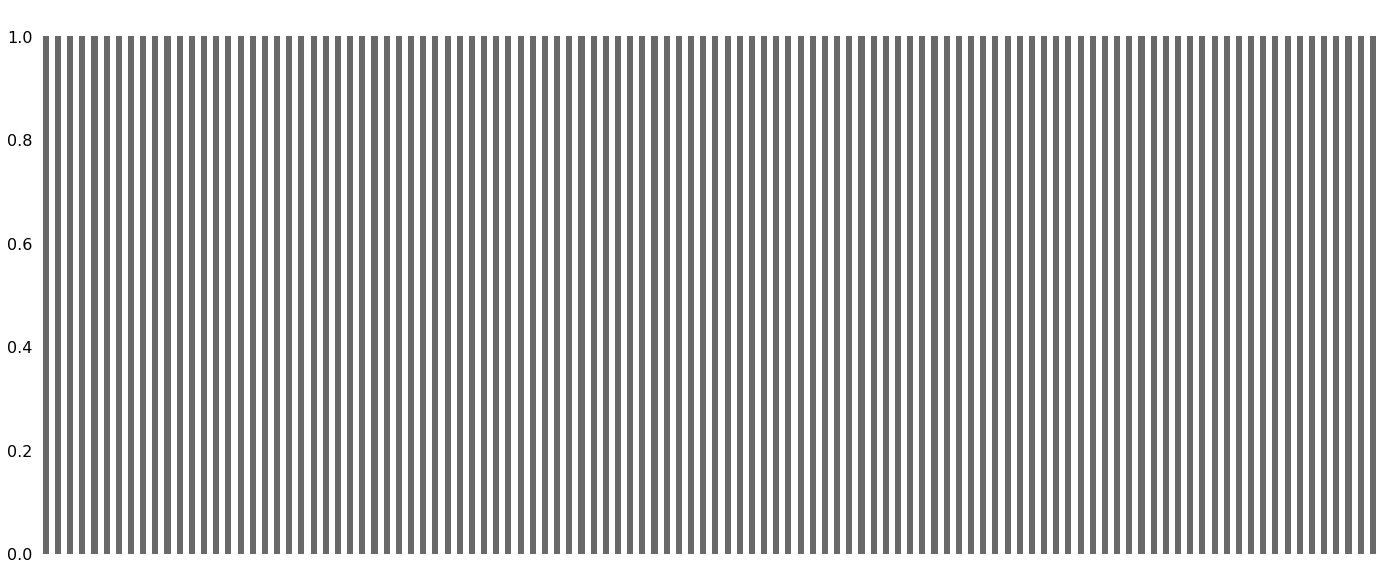

In [21]:
msno.bar(df_copy)

Revisamos la existencia de valores nulos

In [22]:
df_copy.isnull().any().any()

False

Reemplazamos los valores ```&``` y ```' '``` por ```nan```

In [26]:
df_copy.replace(to_replace='&', value=np.nan, inplace=True)

In [27]:
df_copy.replace(to_replace=' ', value=np.nan, inplace=True)

Revisamos (de nuevo) la existencia de valores nulos

In [28]:
df_copy.isnull().any().any()

True

Graficamos los datos con valores nulos reales

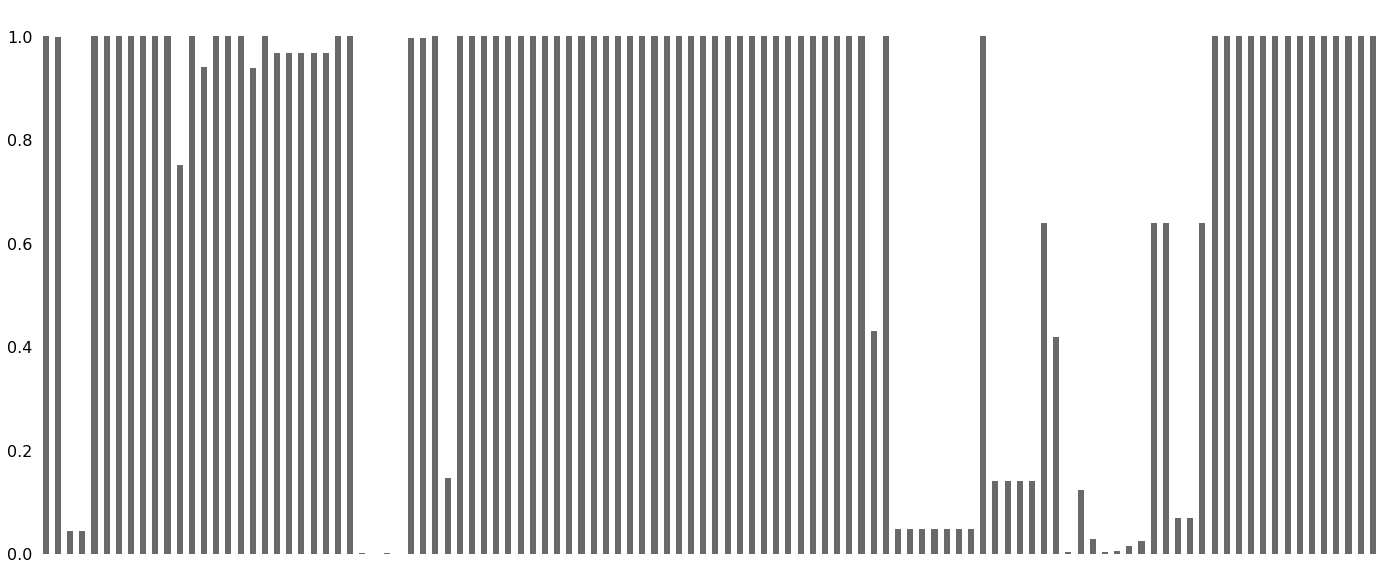

In [36]:
msno.bar(df_copy)

Guardamos el dataframe 

Definimos la ruta

In [30]:
file = 'vivienda_load.csv'

In [31]:
df_copy.to_csv(file)

### Clean

Reemplazamos el

In [44]:
df_copy.fillna(value=-1, inplace=True)

In [45]:
threshold = round(df_copy.shape[0]*.75)
threshold

42510

In [49]:
l = []
for column in df_copy.columns:
    na_column =  df_copy[column].value_counts().get(-1)
    if(na_column != None):
        print(column, ': ', df_copy.shape[0] - na_column, ' - ', threshold)
        if (df_copy.shape[0] - na_column < threshold):
            print(column, ': ', 'd e l e t e d')
            l.append(column)

tipo_viv :  56566  -  42510
condominio :  2530  -  42510
condominio :  d e l e t e d
elevador :  2530  -  42510
elevador :  d e l e t e d
mat_pisos :  56678  -  42510
antiguedad :  42515  -  42510
cocina_dor :  53256  -  42510
dotac_agua :  53152  -  42510
uso_compar :  54866  -  42510
sanit_agua :  54866  -  42510
bano_comp :  54866  -  42510
bano_excus :  54866  -  42510
bano_regad :  54866  -  42510
anio_panel :  44  -  42510
anio_panel :  d e l e t e d
panel_ne :  9  -  42510
panel_ne :  d e l e t e d
pot_panel :  53  -  42510
pot_panel :  d e l e t e d
potencia :  16  -  42510
potencia :  d e l e t e d
focos_inca :  56428  -  42510
focos_ahor :  56428  -  42510
estufa_chi :  8246  -  42510
estufa_chi :  d e l e t e d
estaciona :  24346  -  42510
estaciona :  d e l e t e d
comun11 :  2753  -  42510
comun11 :  d e l e t e d
comun12 :  2753  -  42510
comun12 :  d e l e t e d
comun13 :  2753  -  42510
comun13 :  d e l e t e d
comun14 :  2753  -  42510
comun14 :  d e l e t e d
comun15 

In [50]:
l

['condominio',
 'elevador',
 'anio_panel',
 'panel_ne',
 'pot_panel',
 'potencia',
 'estufa_chi',
 'estaciona',
 'comun11',
 'comun12',
 'comun13',
 'comun14',
 'comun15',
 'comun16',
 'comun17',
 'pago_renta',
 'anio_res',
 'mes_res',
 'familiar',
 'tipo_adqui',
 'financia_1',
 'financia_2',
 'financia_3',
 'financia_4',
 'financia_5',
 'financia_6',
 'financia_7',
 'financia_8',
 'num_dueno1',
 'hog_dueno1',
 'num_dueno2',
 'hog_dueno2',
 'escrituras',
 'ageb']

In [51]:
df_copy.drop(labels=l, axis=1, inplace=True)

In [52]:
df_copy.replace(to_replace=-1, value=np.NaN, inplace=True)

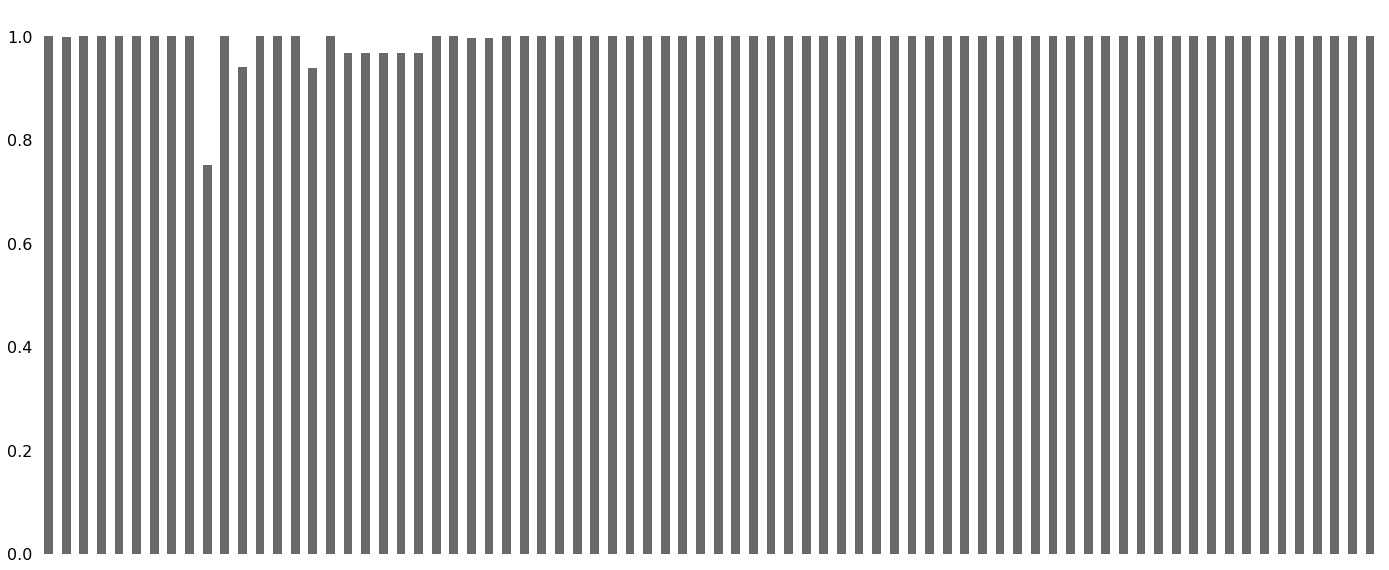

In [53]:
msno.bar(df_copy)

Guardamos el dataframe 

Definimos la ruta

In [55]:
file = 'vivienda_clean.csv'

In [56]:
df_copy.to_csv(file)

A estas alturas podemos también eliminar simplemente las observaciones que tienen valores nulos

```df_copy.dropna(inplace=True)```